# Predicting customer churn for a telecom operator

**Project Description**

A telecom operator wants to combat customer churn. To do this, its employees will start offering promotional codes and special conditions to everyone who plans to cancel their telecom services. Predicting churn is one of the most important tasks for profit forecasting.

**Research Objective**

Develop a model for predicting customer churn, which will allow the company to find such users in advance and take measures to retain them as customers.

**Research Tasks**

The operator's team collected personal data on some customers, information about their tariffs and services. Our task is to train a model on this data to predict whether the subscriber will terminate the contract.

**Additional Conditions**

- To assess the quality of models, use the AUC-ROC metric.
- The AUC-ROC metric value must be at least 0.85.

**Service Description**

The operator provides two main types of services:

- Landline telephone service. The phone can be connected to several lines at the same time.
- Internet. There are two types of connection: via a telephone line (`DSL`, from the English digital subscriber line - "digital subscriber line") or fiber optic cable (`Fiber optic`).

The following services are also available:

- Internet security: antivirus (`DeviceProtection`) and blocking of unsafe sites (`OnlineSecurity`);
- Dedicated technical support line (`TechSupport`);
- Cloud storage of files for data backup (`OnlineBackup`);
- Streaming television (`StreamingTV`) and a movie catalog (`StreamingMovies`).

Customers can pay for services monthly or enter into a contract for 1-2 years. It is possible to pay the bill in different ways, and also receive an electronic check.

**Data Description**

The data consists of several files obtained from different sources:

- `contract_new.csv` — contract information;
- `personal_new.csv` — customer personal data;
- `internet_new.csv` — Internet services information;
- `phone_new.csv` — telephone services information.

Data Description:

1. `contract_new.csv` file — contract information:

- `customerID` — subscriber identifier;
- `BeginDate` — contract start date;
- `EndDate` — contract end date;
- `Type` — payment type: annually or twice a year or monthly;
- `PaperlessBilling` — electronic payslip;
- `PaymentMethod` — payment type;
- `MonthlyCharges` — monthly expenses;
- `TotalCharges` — subscriber total expenses.

2. `personal_new.csv` file — personal data of the client:

- `customerID` — user identifier;
- `gender` — gender;
- `SeniorCitizen` — whether the subscriber is a pensioner;
- `Partner` — whether the subscriber has a spouse;
- `Dependents` — whether the subscriber has children.

3. `internet_new.csv` file — information about Internet services:

- `customerID` — user identifier;
- `InternetService` — connection type;
- `OnlineSecurity` — blocking dangerous sites;
- `OnlineBackup` — cloud file storage for data backup;
- `DeviceProtection` — antivirus;
- `TechSupport` — dedicated technical support line;
- `StreamingTV` — streaming television;
- `StreamingMovies` — movie catalog.

4. File `phone_new.csv` — information about telephony services:

- `customerID` — user ID;
- `MultipleLines` — connecting the phone to several lines simultaneously.

**Information about contracts is current as of February 1, 2020.**

## Work Plan

1. Importing libraries (add as needed);
2. Loading data and initial visual inspection;
3. Initial data preprocessing (if necessary):
 - renaming columns;
 - changing the data type;
 - handling duplicates and errors;
4. Initial exploratory data analysis:
 - studying quantitative features;
 - studying qualitative features;
5. Combining datasets;
6. Exploratory data analysis and preprocessing of the combined dataframe data:
 - studying quantitative features;
 - studying qualitative features;
 - preprocessing of data after combining the dataframe (if necessary);
 - generating the target feature;
 - generating new features (if necessary);
 - correlation analysis;
 - forming the final dataset for training.
7. Preparing data for training;
8. Training machine learning models;
9. Selecting the best model:
 - evaluating the best model on test data;
 - visualizing the metrics of the best model;
 - assessment of the importance of features.
10. General conclusion and recommendations to the customer.

## Import Libraries

In [ ]:
!pip install phik -q
!pip install scikit-learn --upgrade -q
!pip install shap -q
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import phik
import shap

from phik import phik_matrix

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)

RANDOM_STATE = 60524
TEST_SIZE = 0.25

## Loading Data

In [ ]:
path_1 = '/datasets/contract_new.csv'
path_2 = 'https://code.s3.yandex.net/datasets/contract_new.csv'

if os.path.exists(path_1):
    data_contract = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data_contract = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

<ipython-input-128-706e5d935e7d>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_contract = pd.read_csv(path_2, index_col=[0], parse_dates=[0])


In [ ]:
path_1 = '/datasets/personal_new.csv'
path_2 = 'https://code.s3.yandex.net/datasets/personal_new.csv'

if os.path.exists(path_1):
    data_personal = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data_personal = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

<ipython-input-129-c5eb700e67b5>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_personal = pd.read_csv(path_2, index_col=[0], parse_dates=[0])


In [ ]:
path_1 = '/datasets/internet_new.csv'
path_2 = 'https://code.s3.yandex.net/datasets/internet_new.csv'

if os.path.exists(path_1):
    data_internet = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data_internet = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

<ipython-input-130-88f9beb5cb17>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_internet = pd.read_csv(path_2, index_col=[0], parse_dates=[0])


In [ ]:
path_1 = '/datasets/phone_new.csv'
path_2 = 'https://code.s3.yandex.net/datasets/phone_new.csv'

if os.path.exists(path_1):
    data_phone = pd.read_csv(path_1, index_col=[0], parse_dates=[0])
else:
    try:
        data_phone = pd.read_csv(path_2, index_col=[0], parse_dates=[0])
    except Exception as e:
        print(f'Error loading data from URL: {e}')

<ipython-input-131-7230c97ee5b9>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_phone = pd.read_csv(path_2, index_col=[0], parse_dates=[0])


Let's take a look at the data:

In [ ]:
#universal function for reviewing data
def data_review(data):
    '''
    data - DataFrame

    '''
    print('*'*10, 'The Original DataFrame', '*'*10)
    display(data.head())
    print('')
    print('')
    print('*'*10, 'General Information', '*'*10)
    print('')
    data.info()
    print('')
    print('')
    print('*'*10, 'Has NaN', '*'*10)
    display(pd.DataFrame(data.isna().sum()).style.background_gradient('coolwarm'))
    print('*'*10, 'Has NaN Percentage', '*'*10)
    display(pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm'))
    print('')
    print('')
    print('*'*10, 'Descriptive Statistics', '*'*10)
    display(pd.DataFrame(data.describe()))

In [ ]:
data_review(data_contract)

********** The Original DataFrame **********


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


********** Has NaN **********


,0
BeginDate,0
EndDate,0
Type,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0


********** Has NaN Percentage **********


,0
BeginDate,0.000000
EndDate,0.000000
Type,0.000000
PaperlessBilling,0.000000
PaymentMethod,0.000000
MonthlyCharges,0.000000
TotalCharges,0.000000




********** Descriptive Statistics **********


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [ ]:
data_review(data_personal)

********** The Original DataFrame **********


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


********** Has NaN **********


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0


********** Has NaN Percentage **********


,0
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000




********** Descriptive Statistics **********


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
data_review(data_internet)

********** The Original DataFrame **********


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


********** Has NaN **********


,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


********** Has NaN Percentage **********


,0
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
TechSupport,0.000000
StreamingTV,0.000000
StreamingMovies,0.000000




********** Descriptive Statistics **********


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3498,3088,3095,3473,2810,2785


In [ ]:
data_review(data_phone)

********** The Original DataFrame **********


,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


********** Has NaN **********


,0
MultipleLines,0


********** Has NaN Percentage **********


,0
MultipleLines,0.000000




********** Descriptive Statistics **********


,MultipleLines
count,6361
unique,2
top,No
freq,3390


### Conclusions

- column names are in camelCase notation with violations of the rules, columns need to be converted to snake_case notation;
- the data type in the `TotalCharges` column of the `data_contract` dataframe contains quantitative data and is defined as `object`, needs to be converted to the `float64` type;
- the data type in the `SeniorCitizen` column of the `data_personal` dataframe contains boolean values ​​and is defined as `int64`, needs to be converted to the `bool` type;
- heterogeneous presumably boolean data types expressed by Yes-No values ​​were detected, the need for their conversion and conversion to the `bool` type will be revealed after merging the dataframes;
- no gaps in columns were found.

##  Data Preprocessing

Before starting preprocessing of the original dataset, let's resave it to the df_x variable and create a list of datasets and a dictionary of datasets:

In [ ]:
df_contract = data_contract.copy()
df_personal = data_personal.copy()
df_internet = data_internet.copy()
df_phone = data_phone.copy()

dfs = [df_contract, df_personal, df_internet, df_phone]

dfs_dict = {
    'df_contract': df_contract,
    'df_personal': df_personal,
    'df_internet': df_internet,
    'df_phone': df_phone
}

###  Renaming columns and index

Let's convert the columns to `snake_case` notation and check the result:

In [ ]:
#function to cast to snake_case
def columns_to_snake_case(df):
    df.columns = df.columns.str.replace("([a-z])([A-Z])", r'\1_\2', regex=True).str.lower()
    return df.columns

In [ ]:
for df in dfs:
    columns_to_snake_case(df)
    print(df.columns)

Index(['begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges'],
      dtype='object')
Index(['gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
Index(['internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')
Index(['multiple_lines'], dtype='object')


Let's not forget to cast the dataframe indices assigned when reading the file to `snake_case` and check the result:

In [ ]:
for df in dfs:
    df.index.rename('customer_id', inplace= True )
    print(df.index.name)

customer_id
customer_id
customer_id
customer_id


###  Changing data type

Let's convert the data type of the `total_charges` column to `float64`:

In [ ]:
df_contract['total_charges'] = pd.to_numeric(df_contract['total_charges'], errors='coerce')
print(df_contract['total_charges'].dtype)

float64


The errors='coerce' parameter indicates that if there are invalid values ​​(e.g. non-numeric strings), they will be converted to NaN. So after changing the data type, let's check for gaps:

In [ ]:
df_contract['total_charges'].isna().sum()

11

11 gaps were found. Let's determine their nature. Let's display the rows with missing values ​​in the `total_charges` column:

In [ ]:
missing_values = df_contract[df_contract['total_charges'].isnull()]
missing_values

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
customer_id,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN


We remember that the information about contracts is current as of February 1, 2020. We can conclude that `total_charges` is not defined, since the contract for services was concluded in the last month available to us. Let's check our hypothesis and display all the lines with the contract start date 2020-02-01:

In [ ]:
current_begin_date = df_contract.loc[df_contract['begin_date'] == '2020-02-01']
current_begin_date

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
customer_id,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN


The hypothesis was confirmed.

Let's decide what to do with the missing lines. All concluded contracts with the payment type `once a year or two`, respectively, when concluding the contract `total_charges` could be filled in with the monthly payment multiplied by the contract type. However, a situation may arise in which the client decides to terminate the contract in advance with a refund and possibly even in the current month, returning the entire amount paid. Thus, filling `total_charges` with the payment amount for the current month is also inappropriate. Considering that our goal is to determine the customer churn. Customers who have just concluded a contract do not carry any information for solving our problem. In addition, 11 lines with missing values ​​in the dataset of 7043 lines can be painlessly deleted, especially considering their lack of information for the future model.

**Conclusion: a decision was made to delete lines with missing values.**

In [ ]:
df_contract.dropna(subset = ['total_charges'], inplace=True)
df_contract['total_charges'].isna().sum()

0

**Conclusion: data type converted, 11 rows removed.**

Let's convert the data type of the `senior_citizen` column to the `bool` type:

In [ ]:
df_personal['senior_citizen'] = df_personal['senior_citizen'].apply(lambda x: True if x == 1 else False)

Let's check that the dataset accepted the changes correctly:

In [ ]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          7043 non-null   object
 1   senior_citizen  7043 non-null   bool  
 2   partner         7043 non-null   object
 3   dependents      7043 non-null   object
dtypes: bool(1), object(3)
memory usage: 227.0+ KB


The data has been converted correctly.

### Handling duplicates and errors

Let's check categorical features for implicit duplicates and errors; to do this, we'll select columns with quantitative and categorical features separately.

In [ ]:
def to_num_obj_col(df):
    num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]', 'bool']).columns.tolist()
    obj_col = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    return num_col, obj_col

In [ ]:
num_col_df_contract, obj_col_df_contract = to_num_obj_col(df_contract)
num_col_df_personal, obj_col_df_personal = to_num_obj_col(df_personal)
num_col_df_internet, obj_col_df_internet = to_num_obj_col(df_internet)
num_col_df_phone, obj_col_df_phone = to_num_obj_col(df_phone)

In [ ]:
def obj_col_scan(df, cols):
    print('*'*10, 'Unique Names', '*'*10)
    for col in cols:
        print(col)
        print(df[col].unique())
        print('---' * 10)

In [ ]:
obj_col_scan(df_contract, obj_col_df_contract)

********** Unique Names **********
begin_date
['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-01' '2018-02-01'
 '2016-06-01' '2015-08-01' '2015-11-01' '2014-06-01' '2017-01-01'
 '2015-07-01' '2016-11-01' '20

In [ ]:
obj_col_scan(df_personal, obj_col_df_personal)

********** Unique Names **********
gender
['Female' 'Male']
------------------------------
senior_citizen
[False  True]
------------------------------
partner
['Yes' 'No']
------------------------------
dependents
['No' 'Yes']
------------------------------


In [ ]:
obj_col_scan(df_internet, obj_col_df_internet)

********** Unique Names **********
internet_service
['DSL' 'Fiber optic']
------------------------------
online_security
['No' 'Yes']
------------------------------
online_backup
['Yes' 'No']
------------------------------
device_protection
['No' 'Yes']
------------------------------
tech_support
['No' 'Yes']
------------------------------
streaming_tv
['No' 'Yes']
------------------------------
streaming_movies
['No' 'Yes']
------------------------------


In [ ]:
obj_col_scan(df_phone, obj_col_df_phone)

********** Unique Names **********
multiple_lines
['No' 'Yes']
------------------------------


**Conclusion: No hidden duplicates or errors found:**

Considering the binary nature of the data, we will check the datasets for duplicates by resetting the index.

In [ ]:
for name, df in dfs_dict.items():
    df = df.reset_index()
    diplicated_rows = df.duplicated().sum()
    print('*'*10,'Name:', name, '*'*10, '\n')
    print('Number of Duplicates:', diplicated_rows, '\n')

********** Name: df_contract ********** 

Number of Duplicates: 0 

********** Name: df_personal ********** 

Number of Duplicates: 0 

********** Name: df_internet ********** 

Number of Duplicates: 0 

********** Name: df_phone ********** 

Number of Duplicates: 0 



#### Conclusions

As a result of the initial data preprocessing, the following actions were performed:

1. The column and index names were converted to snake_case notation;
2. The data type of the `total_charges` column was converted to the `float64` type, this conversion resulted in 11 rows with NaN values. As a result of the analysis, these rows were deleted;
3. The data type of the `senior_citizen` column was converted to the `bool` type;
4. No errors or duplicates were found in the data.

##  Exploratory Data Analysis

### Study of quantitative features

To quickly find columns with anomalies, we will create our own function that will build a histogram and a box plot for each quantitative column:

In [ ]:
def num_to_scan(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Histogram
    sns.histplot(df, x=col, bins=50, ax=axes[0])
    axes[0].set_title(col)

    # Boxplot
    df.boxplot(column=col, ax=axes[1])
    axes[1].set_ylabel(col)

    plt.show()

We will examine the quantitative features of the `df_contract` dataframe; the other dataframes do not have quantitative features:

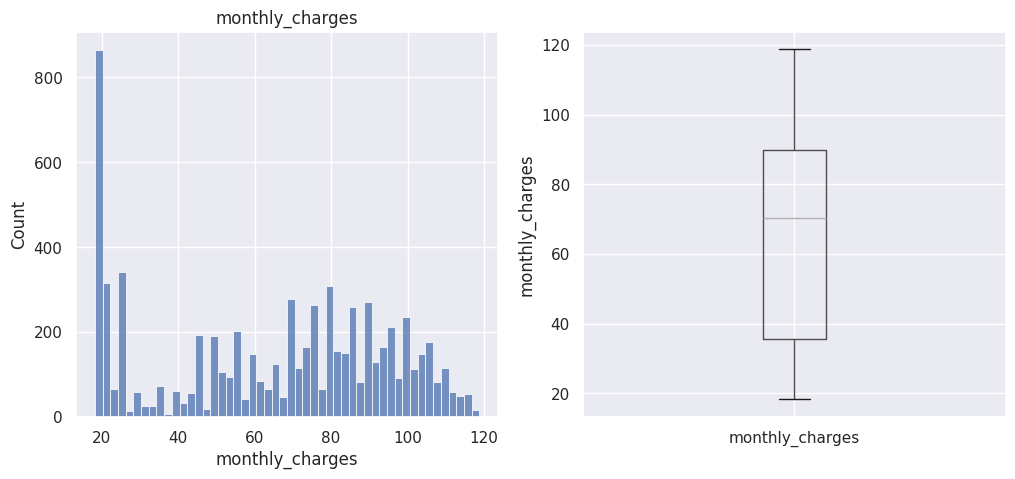

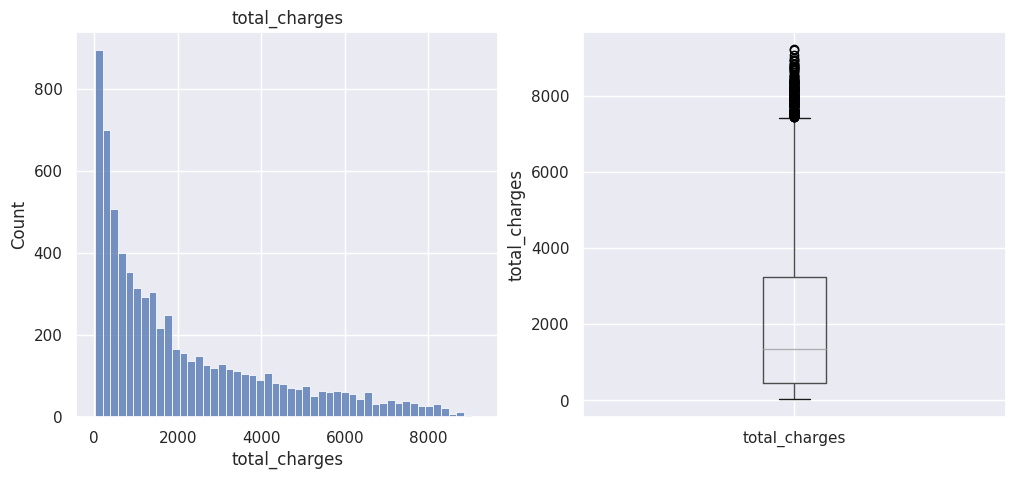

In [ ]:
for col in num_col_df_contract:
    num_to_scan(df_contract, col)

#### Conclusions

1. The histogram of the `monthly_charges` column shows that most clients pay around $20 per month. No outliers were found outside the whisker range;
2. The `total_charges` column has a right-handed distribution. Outliers outside the whisker range were identified; it is not advisable to remove these outliers, since they either represent a group of loyal clients with long-term contracts, or a group of clients with high monthly rates with a risk of contract termination.

### Study of qualitative features

For a quick analysis of qualitative features, we will create our own function that will build a pie chart with the main data for each qualitative feature:

In [ ]:
def cat_to_scan(df, col):
    x = df.groupby(col)[col].count()
    print(x)

    labels = list(x.index)
    colors = sns.color_palette('pastel')[ 0:5 ]

    plt.pie(x, colors = colors, autopct='%.0f%%')

    plt.title(col);
    plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc='best', labels=labels)
    plt.show();

Let's apply the function with qualitative features of dataframes, excluding the column `end_date`, which contains the contract end dates or the value `No` if the client is active.

type
Month-to-month    3875
One year          1472
Two year          1685
Name: type, dtype: int64


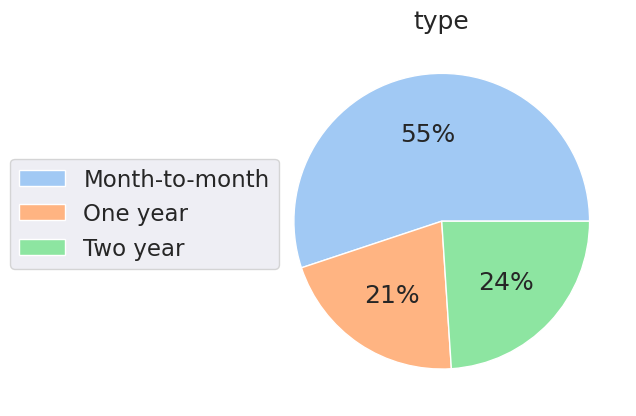

paperless_billing
No     2864
Yes    4168
Name: paperless_billing, dtype: int64


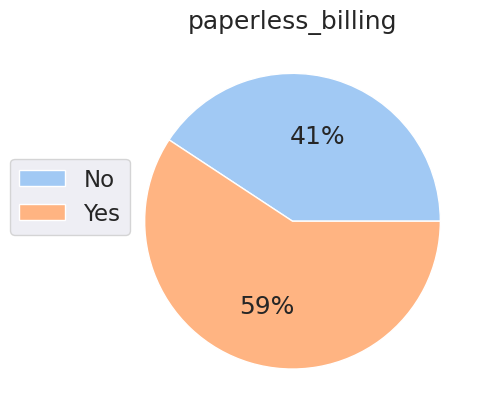

payment_method
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
Name: payment_method, dtype: int64


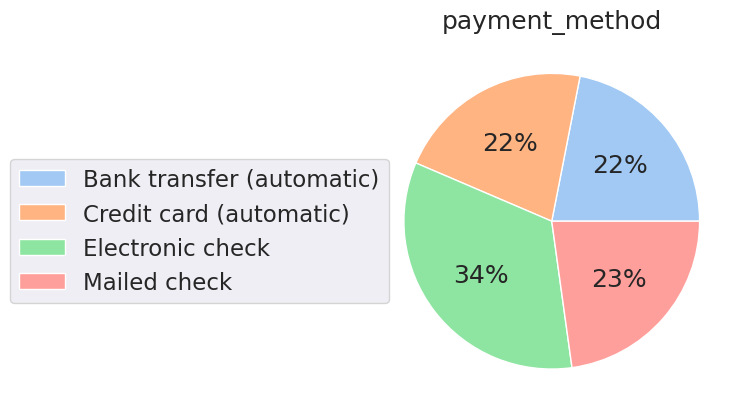

In [ ]:
for col in obj_col_df_contract:
    if col in ['end_date', 'begin_date']:
        pass
    else:
        cat_to_scan(df_contract, col)

gender
Female    3488
Male      3555
Name: gender, dtype: int64


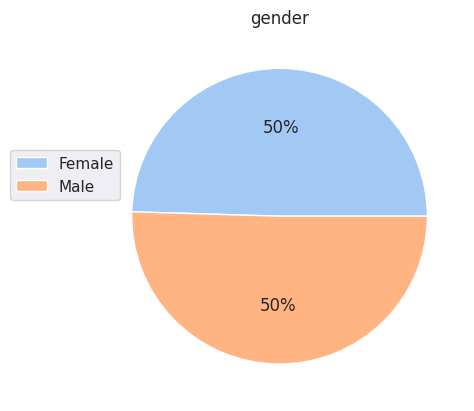

senior_citizen
False    5901
True     1142
Name: senior_citizen, dtype: int64


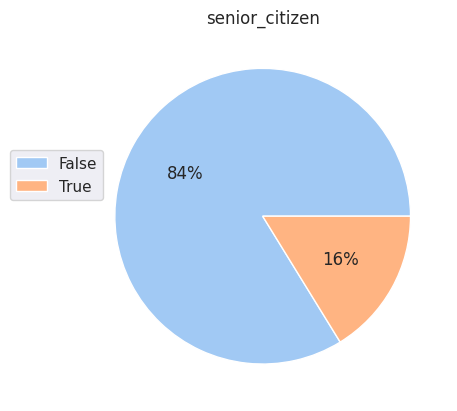

partner
No     3641
Yes    3402
Name: partner, dtype: int64


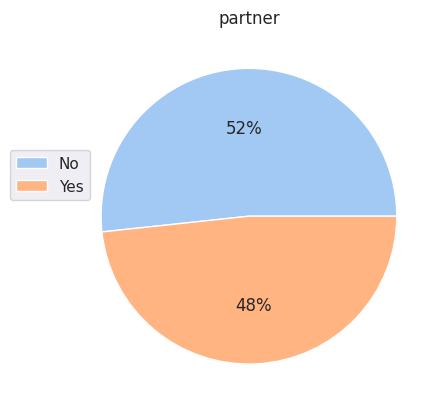

dependents
No     4933
Yes    2110
Name: dependents, dtype: int64


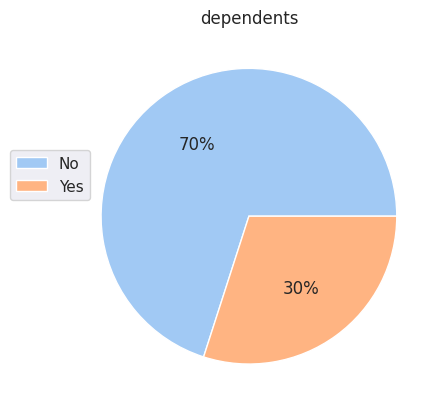

In [ ]:
for col in obj_col_df_personal:
    cat_to_scan(df_personal, col)

internet_service
DSL            2421
Fiber optic    3096
Name: internet_service, dtype: int64


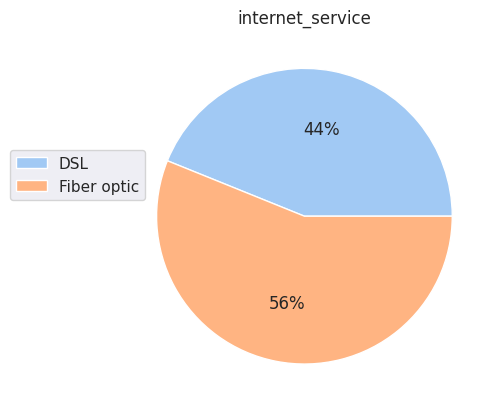

online_security
No     3498
Yes    2019
Name: online_security, dtype: int64


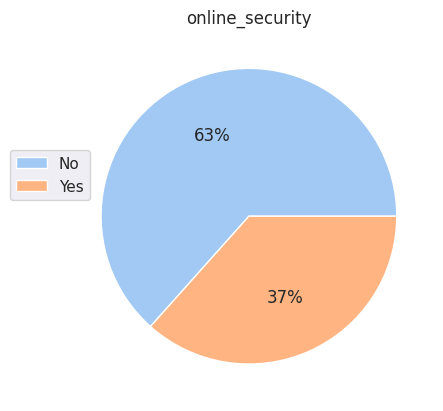

online_backup
No     3088
Yes    2429
Name: online_backup, dtype: int64


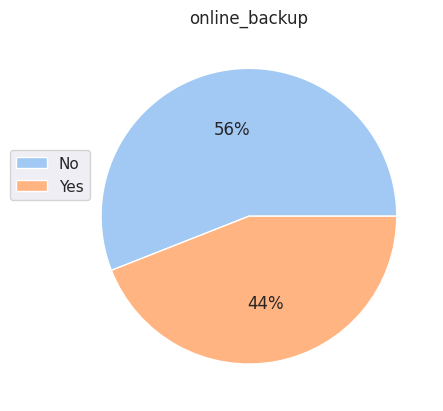

device_protection
No     3095
Yes    2422
Name: device_protection, dtype: int64


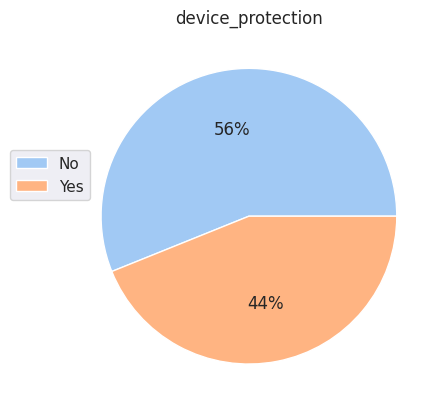

tech_support
No     3473
Yes    2044
Name: tech_support, dtype: int64


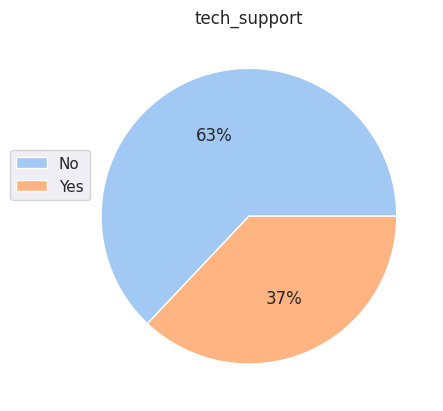

streaming_tv
No     2810
Yes    2707
Name: streaming_tv, dtype: int64


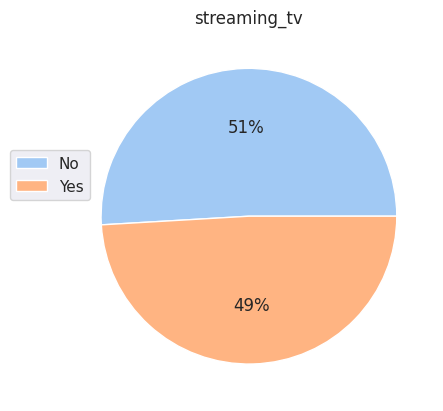

streaming_movies
No     2785
Yes    2732
Name: streaming_movies, dtype: int64


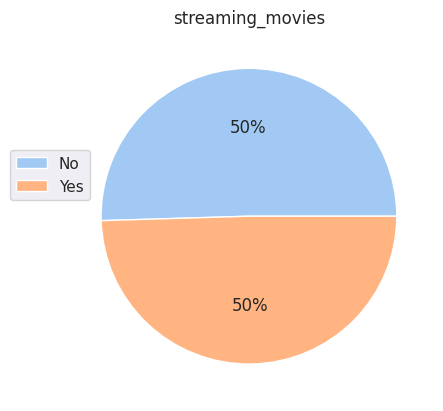

In [ ]:
for col in obj_col_df_internet:
    cat_to_scan(df_internet, col)

multiple_lines
No     3390
Yes    2971
Name: multiple_lines, dtype: int64


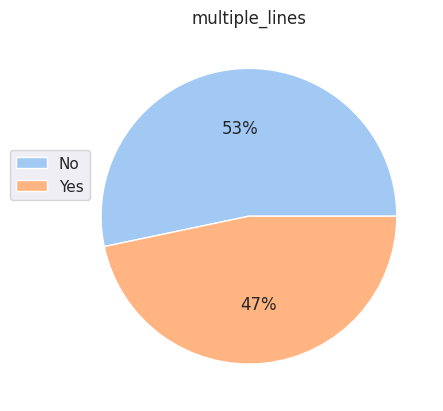

In [ ]:
for col in obj_col_df_phone:
    cat_to_scan(df_phone, col)


#### Conclusions

1. `df_contract`

- The `type` column shows that more than half of the clients prefer monthly payments to long-term contracts. Contracts for 1 and 2 years divide the other half of the clients almost equally;
- The `paperless_billing` column shows that 59% of clients prefer not to receive paper bills, this is a good sign for the environment;
- The `payment_method` column shows that the electronic check is the leading payment method with 34%, the other 3 types of payment are divided equally by 22 - 23% of clients.

2. `df_personal`

- The `gender` column tells us that there are exactly equal numbers of men and women among the clients;
- The `senior_citizen` column shows that only 16% of clients have reached retirement age;
- The `partner` column shows that clients with and without partners are also divided approximately equally;
- The `dependents` column determined that 30% of clients have children.

3. `df_internet`, `df_phone`

- `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` of the `df_internet`, `df_phone` dataframes show that clients use various services of the company with a distribution of approximately 37% to 63% to 50% to 50%.


### Conclusions about relevant features

Having studied all the available features, we can conclude that, with the exception of the features `begin_date` and `end_date`, from which more informative features and the target feature can be obtained in the future, all other features are suitable for training the model.

##  Data Merging

Let's sequentially join the dataframes by index:

In [ ]:
df_full = df_contract.join(df_personal, how='left')
df_full = df_full.join(df_internet, how='left')
df_full = df_full.join(df_phone, how='left')

Let's check the result of the union:

In [ ]:
data_review(df_full)

********** The Original DataFrame **********


,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,False,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,False,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,False,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,False,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,False,No,No,Fiber optic,No,No,No,No,No,No,No




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7032 non-null   object 
 1   end_date           7032 non-null   object 
 2   type               7032 non-null   object 
 3   paperless_billing  7032 non-null   object 
 4   payment_method     7032 non-null   object 
 5   monthly_charges    7032 non-null   float64
 6   total_charges      7032 non-null   float64
 7   gender             7032 non-null   object 
 8   senior_citizen     7032 non-null   bool   
 9   partner            7032 non-null   object 
 10  dependents         7032 non-null   object 
 11  internet_service   5512 non-null   object 
 12  online_security    5512 non-null   object 
 13  online_backup      5512 non-null   object 
 14  device_protection  5512 non-null   object 
 15  tech_support     

,0
begin_date,0
end_date,0
type,0
paperless_billing,0
payment_method,0
monthly_charges,0
total_charges,0
gender,0
senior_citizen,0
partner,0


********** Has NaN Percentage **********


,0
begin_date,0.000000
end_date,0.000000
type,0.000000
paperless_billing,0.000000
payment_method,0.000000
monthly_charges,0.000000
total_charges,0.000000
gender,0.000000
senior_citizen,0.000000
partner,0.000000




********** Descriptive Statistics **********


,monthly_charges,total_charges
count,7032.000000,7032.000000
mean,64.798208,2118.621822
std,30.085974,2112.736199
min,18.250000,19.050000
25%,35.587500,439.745000
50%,70.350000,1345.275000
75%,89.862500,3239.317500
max,118.750000,9221.380000


So, after joining, we got missing values ​​in those rows where the client does not use the service. The number of rows with gaps is quite large, their removal is impractical and leads to the loss of a large amount of data. Let's replace the gaps in the columns with the placeholder `Not used`:

In [ ]:
df_full.fillna('Not used', inplace=True)

Let's check that there are no missing values:

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7032 non-null   object 
 1   end_date           7032 non-null   object 
 2   type               7032 non-null   object 
 3   paperless_billing  7032 non-null   object 
 4   payment_method     7032 non-null   object 
 5   monthly_charges    7032 non-null   float64
 6   total_charges      7032 non-null   float64
 7   gender             7032 non-null   object 
 8   senior_citizen     7032 non-null   bool   
 9   partner            7032 non-null   object 
 10  dependents         7032 non-null   object 
 11  internet_service   7032 non-null   object 
 12  online_security    7032 non-null   object 
 13  online_backup      7032 non-null   object 
 14  device_protection  7032 non-null   object 
 15  tech_support       7032 non-null   object 
 16  streaming_tv  

### Conclusions

The features are combined into one dataframe, missing values ​​are processed.

##  Exploratory Analysis of the Combined Dataframe

In [ ]:
num_col_df_full, obj_col_df_full = to_num_obj_col(df_full)

### Study of quantitative features

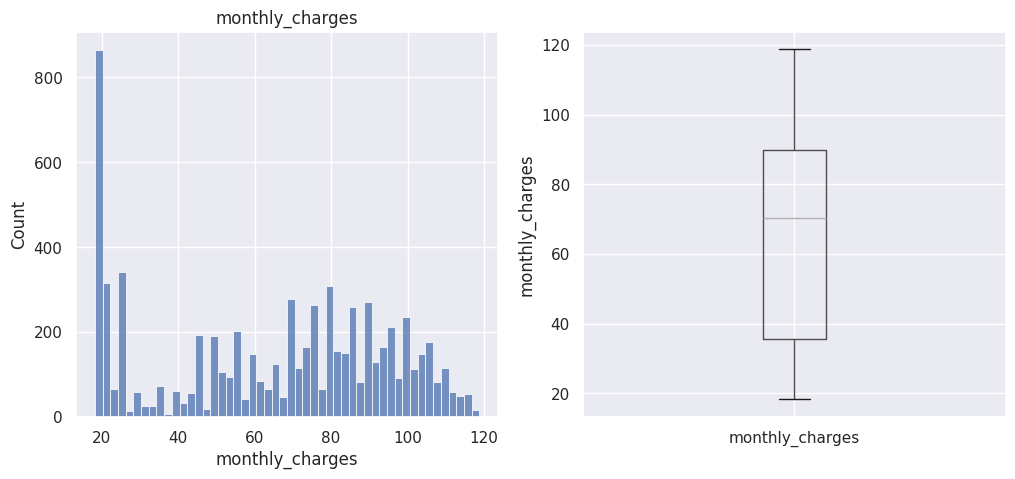

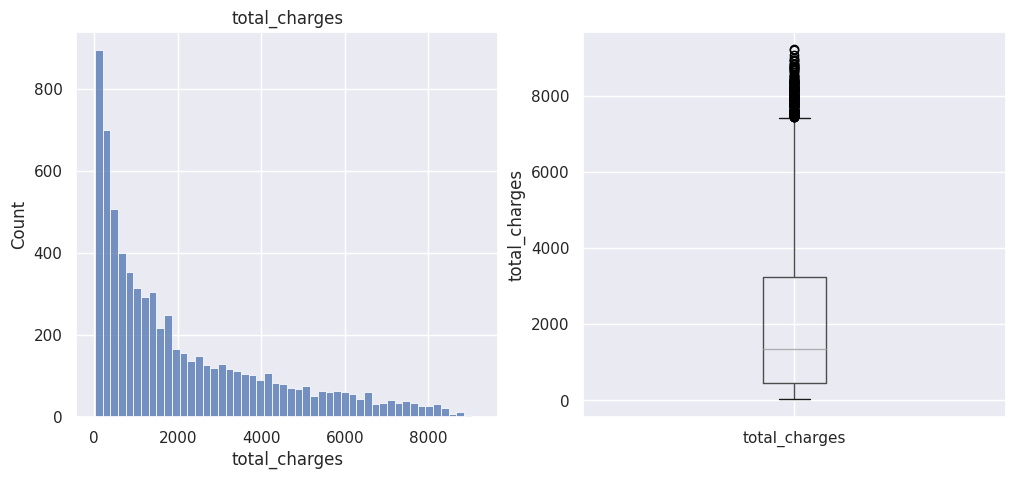

In [ ]:
for col in num_col_df_full:
    num_to_scan(df_full, col)

### Study of qualitative features

type
Month-to-month    3875
One year          1472
Two year          1685
Name: type, dtype: int64


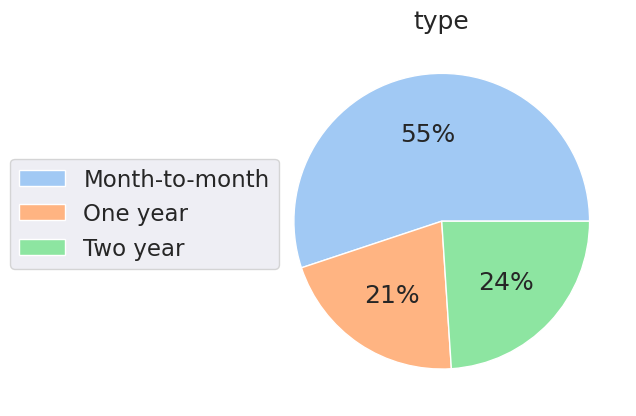

paperless_billing
False    2864
True     4168
Name: paperless_billing, dtype: int64


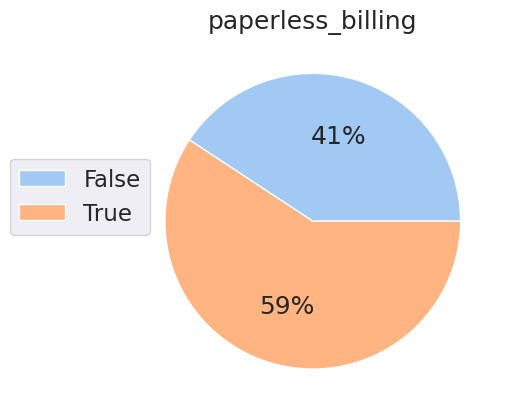

payment_method
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
Name: payment_method, dtype: int64


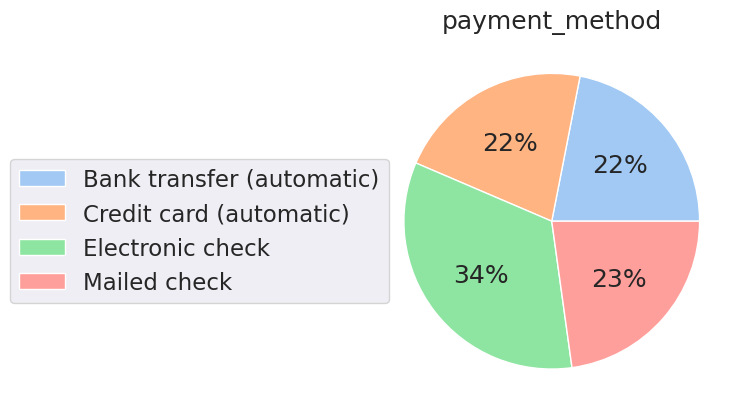

gender
Female    3483
Male      3549
Name: gender, dtype: int64


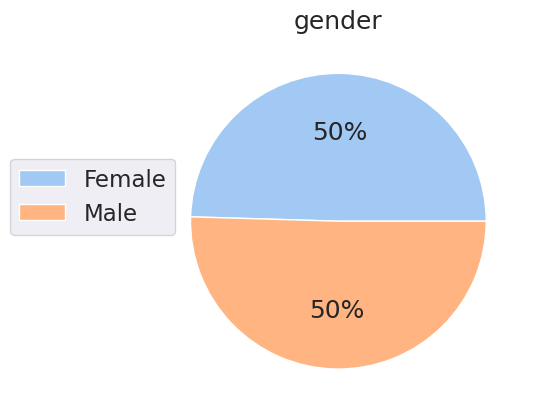

senior_citizen
False    5890
True     1142
Name: senior_citizen, dtype: int64


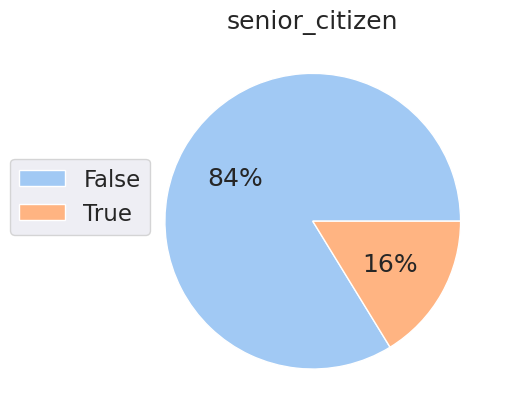

partner
False    3639
True     3393
Name: partner, dtype: int64


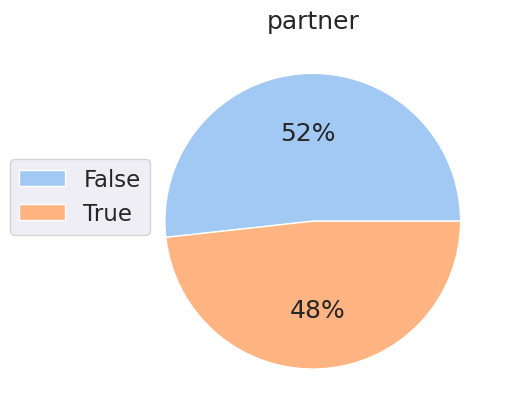

dependents
False    4933
True     2099
Name: dependents, dtype: int64


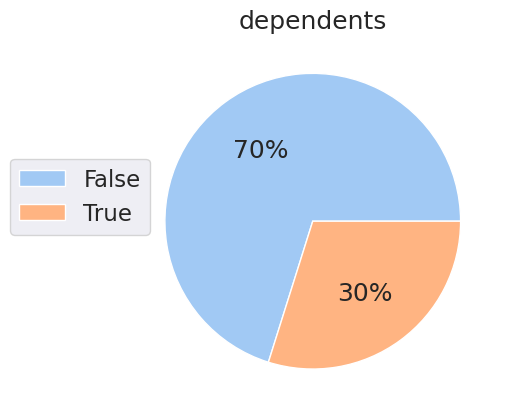

internet_service
DSL            2416
Fiber optic    3096
Not used       1520
Name: internet_service, dtype: int64


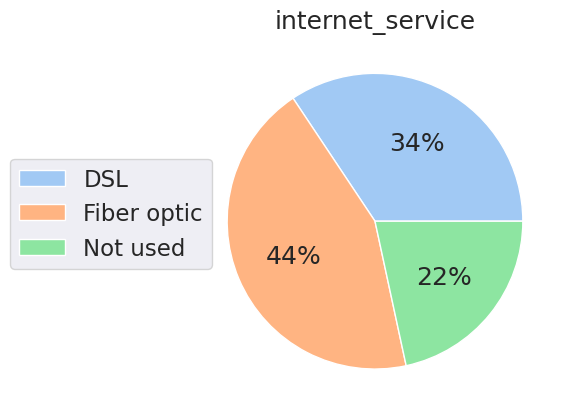

online_security
No          3497
Not used    1520
Yes         2015
Name: online_security, dtype: int64


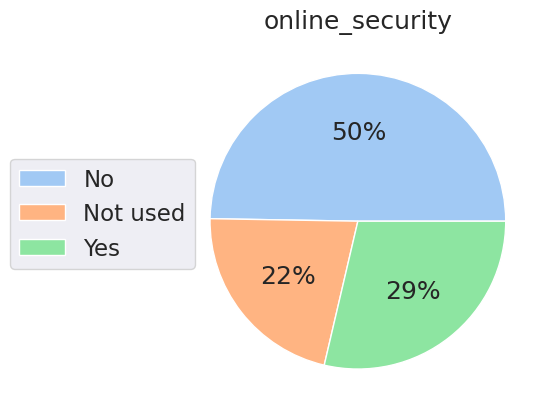

online_backup
No          3087
Not used    1520
Yes         2425
Name: online_backup, dtype: int64


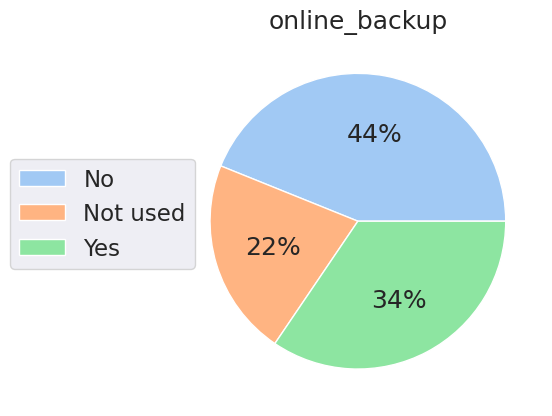

device_protection
No          3094
Not used    1520
Yes         2418
Name: device_protection, dtype: int64


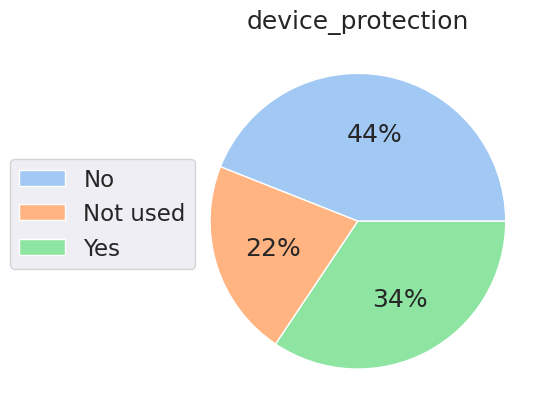

tech_support
No          3472
Not used    1520
Yes         2040
Name: tech_support, dtype: int64


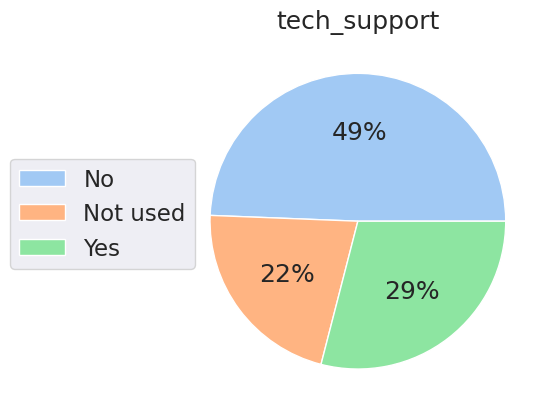

streaming_tv
No          2809
Not used    1520
Yes         2703
Name: streaming_tv, dtype: int64


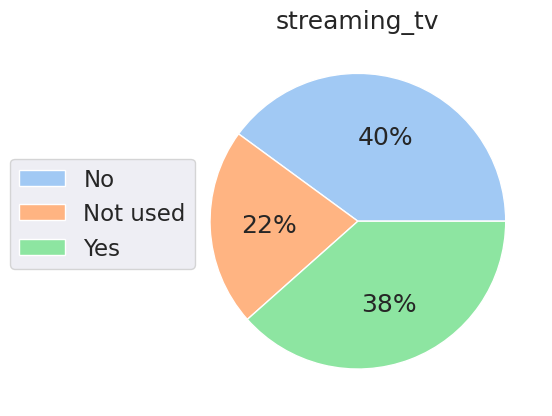

streaming_movies
No          2781
Not used    1520
Yes         2731
Name: streaming_movies, dtype: int64


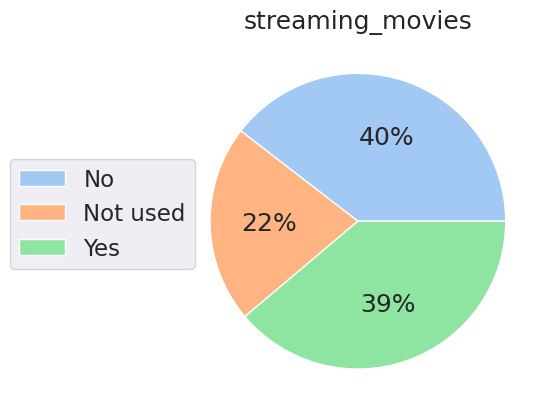

multiple_lines
No          3385
Not used     680
Yes         2967
Name: multiple_lines, dtype: int64


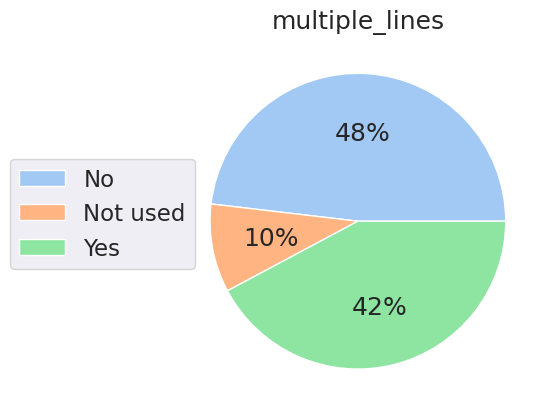

In [ ]:
for col in obj_col_df_full:
    if col in ['end_date', 'begin_date']:
        pass
    else:
        cat_to_scan(df_full, col)

#### Conclusions

1. Quantitative features have not changed;
2. Qualitative features, in which we put the `Not used` placeholder, have an additional value, features that could previously be binary, are no longer so.
3. As binary features with the `object` data type, we have the columns `paperless_billing`, `gender`, `partner`, `dependents`. This data type needs to be converted to `bool`.

### Preprocessing of the merged dataframe data

####  Changing data type

Let's convert the data type of binary features to the `bool` type:

In [ ]:
columns_to_bool = ['paperless_billing', 'partner', 'dependents']

In [ ]:
for col in columns_to_bool:
    df_full[col] = df_full[col].apply(lambda x: True if x == 'Yes' else False)

Let's check the result:

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7032 non-null   object 
 1   end_date           7032 non-null   object 
 2   type               7032 non-null   object 
 3   paperless_billing  7032 non-null   bool   
 4   payment_method     7032 non-null   object 
 5   monthly_charges    7032 non-null   float64
 6   total_charges      7032 non-null   float64
 7   gender             7032 non-null   object 
 8   senior_citizen     7032 non-null   bool   
 9   partner            7032 non-null   bool   
 10  dependents         7032 non-null   bool   
 11  internet_service   7032 non-null   object 
 12  online_security    7032 non-null   object 
 13  online_backup      7032 non-null   object 
 14  device_protection  7032 non-null   object 
 15  tech_support       7032 non-null   object 
 16  streaming_tv  

###  Generation of target and new features

####  Generation of target feature

Let's create a target feature from the `end_date` column:

In [ ]:
df_full['target'] = df_full['end_date'].apply(lambda x: 0 if x == 'No' else 1)

Let's check that the target feature has been added:

In [ ]:
df_full.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target
customer_id,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,True,Electronic check,29.85,31.04,Female,False,True,False,DSL,No,Yes,No,No,No,No,Not used,0
5575-GNVDE,2017-04-01,No,One year,False,Mailed check,56.95,2071.84,Male,False,False,False,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,No,Month-to-month,True,Mailed check,53.85,226.17,Male,False,False,False,DSL,Yes,Yes,No,No,No,No,No,0
7795-CFOCW,2016-05-01,No,One year,False,Bank transfer (automatic),42.30,1960.60,Male,False,False,False,DSL,Yes,No,Yes,Yes,No,No,Not used,0
9237-HQITU,2019-09-01,No,Month-to-month,True,Electronic check,70.70,353.50,Female,False,False,False,Fiber optic,No,No,No,No,No,No,No,0


Let's look at the distribution of the target feature:

target
0    5931
1    1101
Name: target, dtype: int64


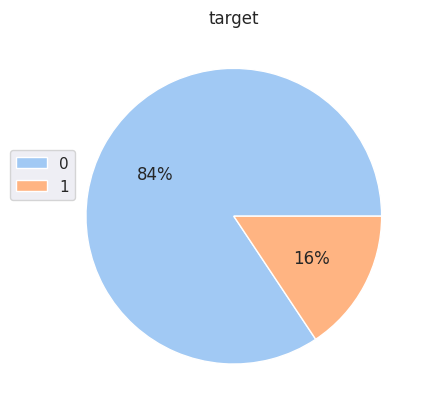

In [ ]:
cat_to_scan(df_full, 'target')

An imbalance in the target feature was detected.

####  Generation of new features

Let's create a new feature - the number of days of the contract. To do this, we will create an additional column from the `end_date` column, where we will replace the `No` value with the last date of the dataset - 2020-02-01.

In [ ]:
df_full['end_date_2'] = df_full['end_date'].apply(lambda x: '2020-02-01' if x == 'No' else x)

And we will convert the column to the `datetime64[ns]` type:

In [ ]:
df_full['end_date_2'] = df_full['end_date_2'].astype('datetime64[ns]')

Let's create a new feature:

In [ ]:
df_full['begin_date'] = pd.to_datetime(df_full['begin_date'], errors='coerce')
df_full['end_date_2'] = pd.to_datetime(df_full['end_date_2'], errors='coerce')

df_full['duration'] = (df_full['end_date_2'] - df_full['begin_date']).dt.days

Let's check the result:

In [ ]:
df_full.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,end_date_2,duration
customer_id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,True,Electronic check,29.85,31.04,Female,False,True,...,No,Yes,No,No,No,No,Not used,0,2020-02-01,31
5575-GNVDE,2017-04-01,No,One year,False,Mailed check,56.95,2071.84,Male,False,False,...,Yes,No,Yes,No,No,No,No,0,2020-02-01,1036
3668-QPYBK,2019-10-01,No,Month-to-month,True,Mailed check,53.85,226.17,Male,False,False,...,Yes,Yes,No,No,No,No,No,0,2020-02-01,123
7795-CFOCW,2016-05-01,No,One year,False,Bank transfer (automatic),42.30,1960.60,Male,False,False,...,Yes,No,Yes,Yes,No,No,Not used,0,2020-02-01,1371
9237-HQITU,2019-09-01,No,Month-to-month,True,Electronic check,70.70,353.50,Female,False,False,...,No,No,No,No,No,No,No,0,2020-02-01,153


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   bool          
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   bool          
 9   partner            7032 non-null   bool          
 10  dependents         7032 non-null   bool          
 11  internet_service   7032 non-null   object        
 12  online_security    7032 non-null   object        
 13  online_backup      7032 non-null   object        
 14

###  Correlation analysis

Let's check the signs for multicollinearity:

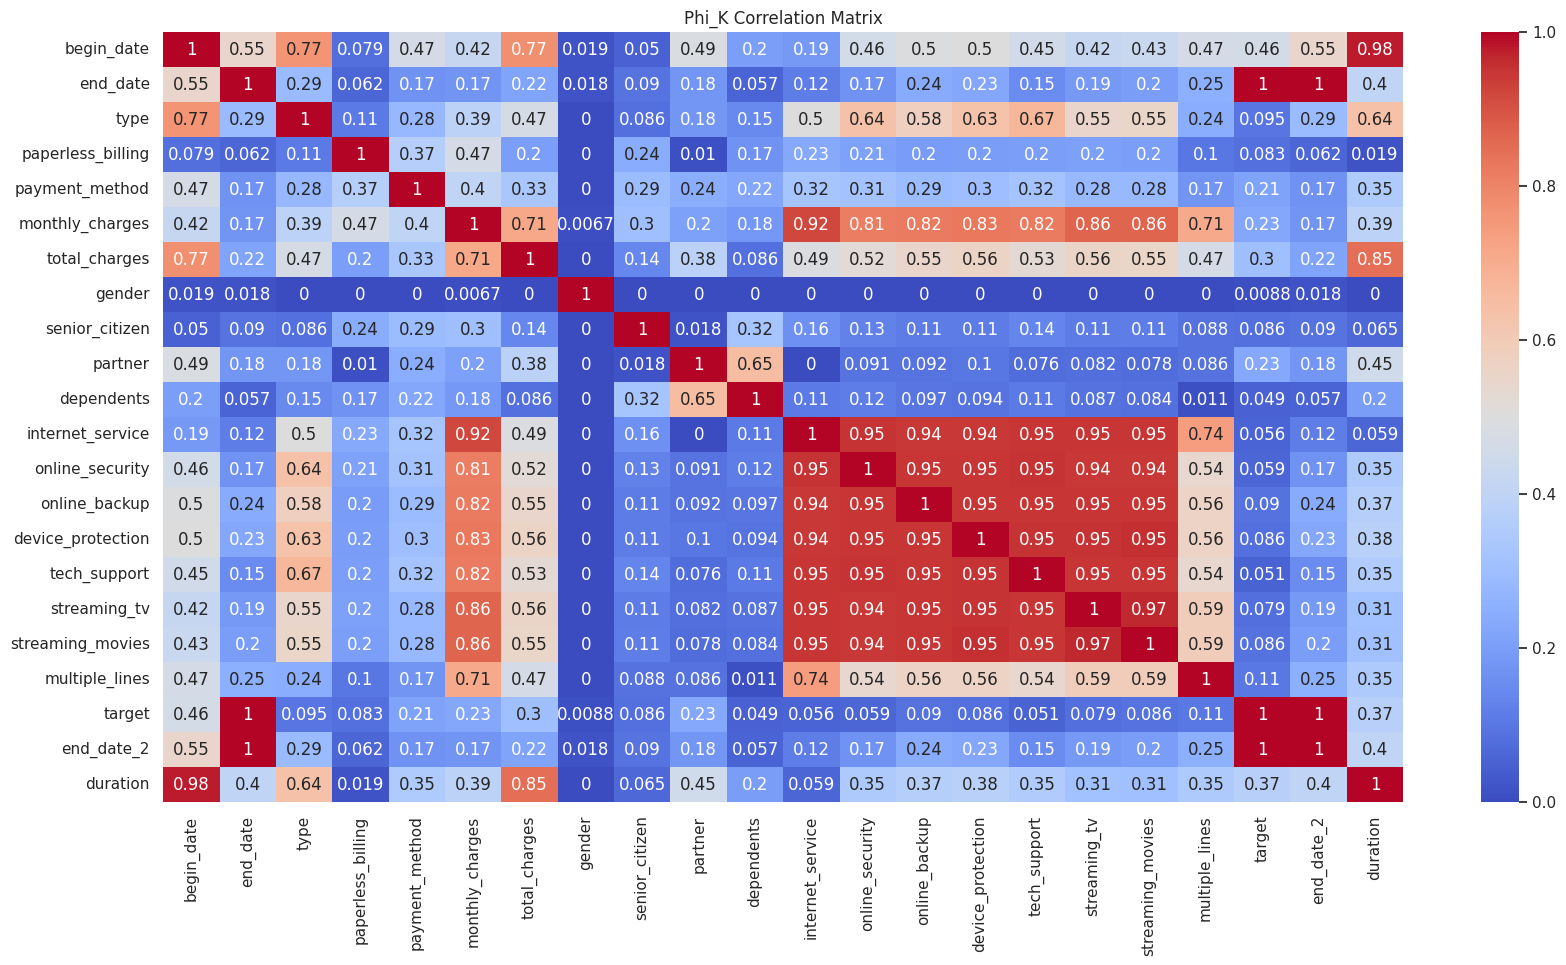

In [ ]:
corr_matrix = df_full.phik_matrix(
    interval_cols=[
        'monthly_charges',
        'total_charges',
        'duration'
    ]
)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show();

Additionally, we visualize the correlation coefficients for the target feature `target` `1` - `client left`, `0` - `client stayed` let's look at the differences:

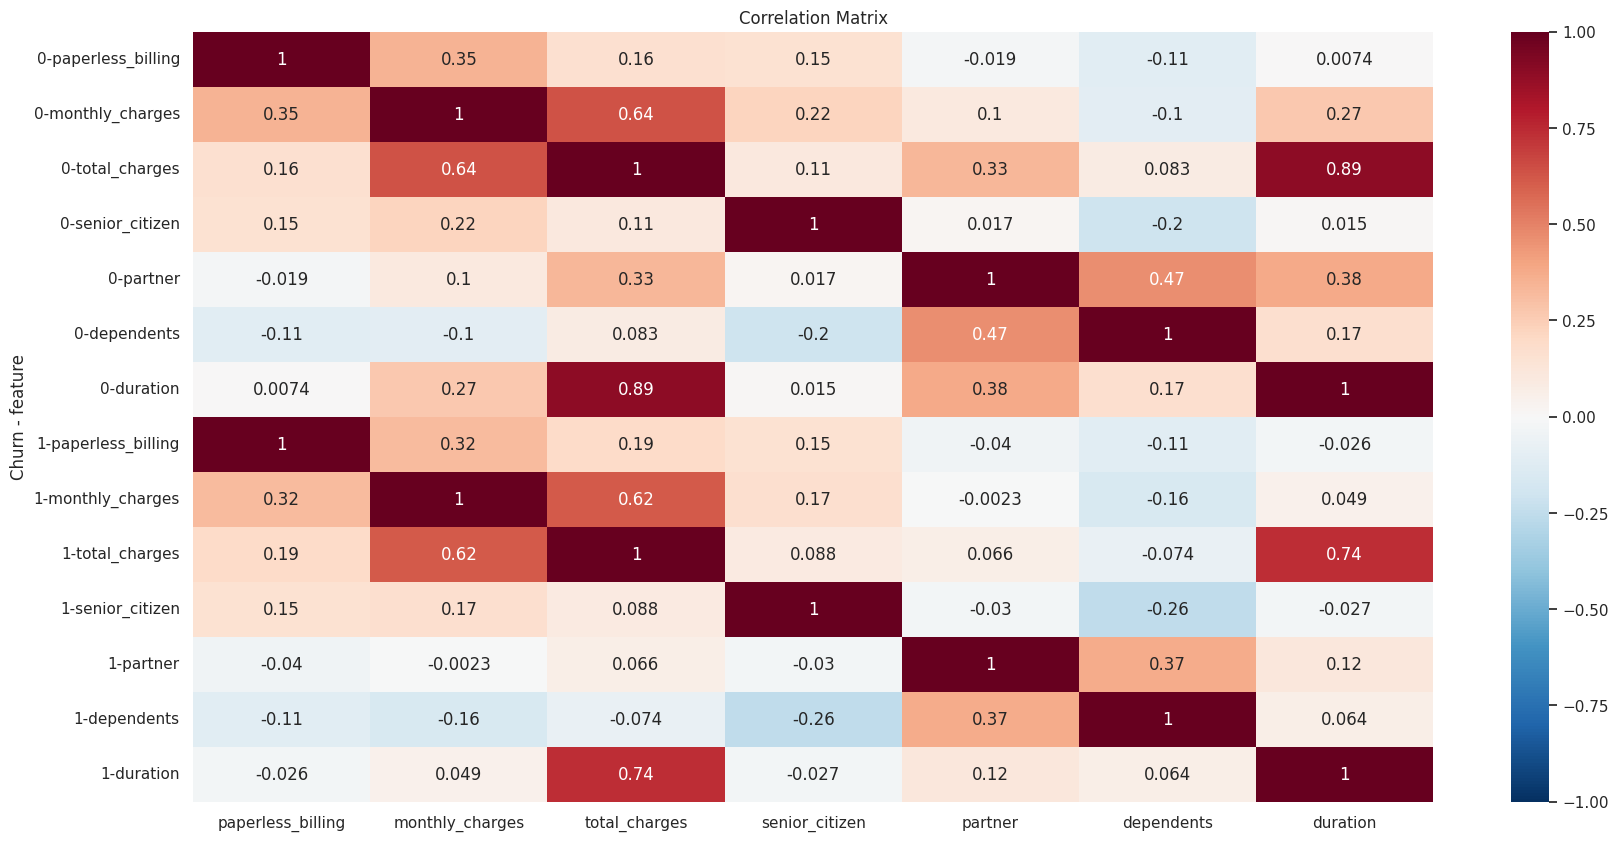

In [ ]:
df_full_corr_1 = df_full.groupby('target') \
[['paperless_billing',
  'monthly_charges', 'total_charges', 'senior_citizen',
  'partner', 'dependents', 'duration']].corr(method='spearman')

sns.set(font_scale=1)
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_full_corr_1,
    annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap= 'RdBu_r');

plt.title('Correlation Matrix')
plt.ylabel('Churn - feature');

#### Conclusions

1. Multicollinearities (very high correlations (0.9 +)) were found among columns with dates and their derivatives. For further training, we will exclude the columns `begin_date`, `end_date`, `end_date_2`. Multicollinearities were also found within features with Internet services.

2. High correlations were found between the column `monthly_charges` and columns with additional Internet services. This is natural.

3. The target feature `target` has a weak correlation with the input feature `duration`, `total_charges`, `monthly_charges`, `partner`, `payment_method` - from 0.21 to 0.37, with other features the correlation is very weak.

### Formation of the final dataset for training

For further training, features with dates will be excluded, since they are multicollinear to the new feature `duration` and, in principle, cannot be used to train the model, since during further operation of the model in production, the dates will differ from those on which the model would be trained.

Let's remove irrelevant features:

In [ ]:
df_final = df_full.drop(['begin_date', 'end_date', 'end_date_2'], axis=1)

Let's check the resulting dataframe:

In [ ]:
df_final.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,duration
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,True,Electronic check,29.85,31.04,Female,False,True,False,DSL,No,Yes,No,No,No,No,Not used,0,31
5575-GNVDE,One year,False,Mailed check,56.95,2071.84,Male,False,False,False,DSL,Yes,No,Yes,No,No,No,No,0,1036
3668-QPYBK,Month-to-month,True,Mailed check,53.85,226.17,Male,False,False,False,DSL,Yes,Yes,No,No,No,No,No,0,123
7795-CFOCW,One year,False,Bank transfer (automatic),42.30,1960.60,Male,False,False,False,DSL,Yes,No,Yes,Yes,No,No,Not used,0,1371
9237-HQITU,Month-to-month,True,Electronic check,70.70,353.50,Female,False,False,False,Fiber optic,No,No,No,No,No,No,No,0,153


##  Data Preparation

Let's create a function to prepare the data:

In [ ]:
#data preparation function
def prepare_data(df):
    X = df.drop(['target'], axis=1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        stratify=y,
        test_size=TEST_SIZE,
        random_state=RANDOM_STATE
    )
    num_col_names = X_train.select_dtypes(include='number').columns.tolist()
    cat_col_names = X_train.select_dtypes(exclude='number').columns.tolist()

    return X_train, X_test, y_train, y_test, num_col_names, cat_col_names

In [ ]:
X_train, X_test, y_train, y_test, num_col_names, cat_col_names = prepare_data(df_final)

Let's check the sizes and dimensions of the obtained samples:

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 18), (1758, 18), (5274,), (1758,))

##  Training Machine Learning Models

Let's create a dictionary of models with hyperparameters to search for the best model using the RandomizedSearchCV method. Since most of our features are categorical, it is advisable to take CatBoostClassifier among possible models for training. However, among the 5 features that are more significantly correlated with the target feature - 3 quantitative, we will also try the LogisticRegression model. As a result, we will take 2 models to search for the best one: CatBoostClassifier and LogisticRegression.

In [ ]:
param_grid = [
    {
        'models': [CatBoostClassifier(random_seed=RANDOM_STATE, verbose=False)],
        'models__iterations': [500, 1000],
        'models__learning_rate': [0.01, 0.05],
        'models__depth': [4, 6]
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 10),
        'preprocessor__num':[StandardScaler(), MinMaxScaler()]
    }
]

Let's create a pipeline for coding and scaling in case of using models for training that require this stage, for example, LogisticRegression.ssion.

In [ ]:
data_preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_col_names),
    ('num', MinMaxScaler(), num_col_names)
],
    remainder='passthrough'
)

Let's create the final pipeline for training the model:

In [ ]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', CatBoostClassifier(random_seed=RANDOM_STATE, verbose=False))
    ]
)

Let's run an automatic search for the best model using the RandomizedSearchCV method with the ROC-AUC metric. The choice of metric is determined by its resistance to unbalanced classes:

In [ ]:
random_search = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['type',
                                                                                'paperless_billing',
                                                                                'payment_method',
                                                                                'gender',
                                                                                'senior_citizen',
                                                                                'partner',
                                                                                'dependents',
                                                                                'internet_service',
                                                                                'online_security',
                                                                                'online_backup',
                                                                                'device_protection',
                                                                                't...
                   param_distributions=[{'models': [<catboost.core.CatBoostClassifier object at 0x7eb9ea815ea0>],
                                         'models__depth': [4, 6],
                                         'models__iterations': [500, 1000],
                                         'models__learning_rate': [0.01, 0.05]},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=60524,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   random_state=60524, scoring='roc_auc')

In [ ]:
random_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type', 'paperless_billing',
                                                   'payment_method', 'gender',
                                                   'senior_citizen', 'partner',
                                                   'dependents',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'multiple_lines']),
                                                 ('num', MinMaxScaler(),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'duration'])])),
                ('models',
                 <catboost.core.CatBoostClassifier object at 0x7eb9ea815480>)])

In [ ]:
print(f'AUC-ROC for the best CatBoostClassifier model on cross-validation: {random_search.best_score_:.2f}')

AUC-ROC for the best CatBoostClassifier model on cross-validation: 0.90


In [ ]:
rs = pd.DataFrame(random_search.cv_results_)
rs.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__C,param_models,param_models__learning_rate,param_models__iterations,param_models__depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.722722,0.252668,0.067781,0.032295,MinMaxScaler(),9.0,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.790200,0.758032,0.761798,0.756745,0.760998,0.765555,0.012462,13
1,9.610851,1.959340,0.095091,0.031786,NaN,NaN,<catboost.core.CatBoostClassifier object at 0x...,0.05,1000.0,4.0,"{'models__learning_rate': 0.05, 'models__itera...",0.919674,0.902560,0.900361,0.908676,0.881740,0.902602,0.012398,1
2,0.722073,0.315643,0.040811,0.026192,StandardScaler(),1.0,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.789346,0.757835,0.761355,0.757085,0.760514,0.765227,0.012165,20
3,0.573460,0.075057,0.033056,0.012233,StandardScaler(),6.0,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.789509,0.758189,0.761845,0.756813,0.760930,0.765457,0.012162,16
4,11.877310,0.716182,0.075465,0.044006,NaN,NaN,<catboost.core.CatBoostClassifier object at 0x...,0.05,1000.0,6.0,"{'models__learning_rate': 0.05, 'models__itera...",0.911319,0.908403,0.890317,0.905638,0.876006,0.898337,0.013313,2


##  Choosing the best model

Based on the results of RandomSearch cross-validation, the best model CatBoostClassifier was selected with the hyperparameters:

In [ ]:
random_search.best_params_

{'models__learning_rate': 0.05,
 'models__iterations': 1000,
 'models__depth': 4,
 'models': <catboost.core.CatBoostClassifier at 0x7eb9ea815ea0>}

###  Evaluation of the best model on test data

Let's test the model on test data:

In [ ]:
y_test_pred_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]

In [ ]:
AUC_ROC_test = roc_auc_score(y_test, y_test_pred_proba)
print(f'AUC-ROC for the best model on test data: {AUC_ROC_test:.2f}')

AUC-ROC for the best model on test data: 0.92


####  Conclusions

**Success criterion: AUC-ROC > 0.85 on the test sample - achieved.**

###  Visualization of the best model metrics

Let's plot the ROC curve to visualize the result:

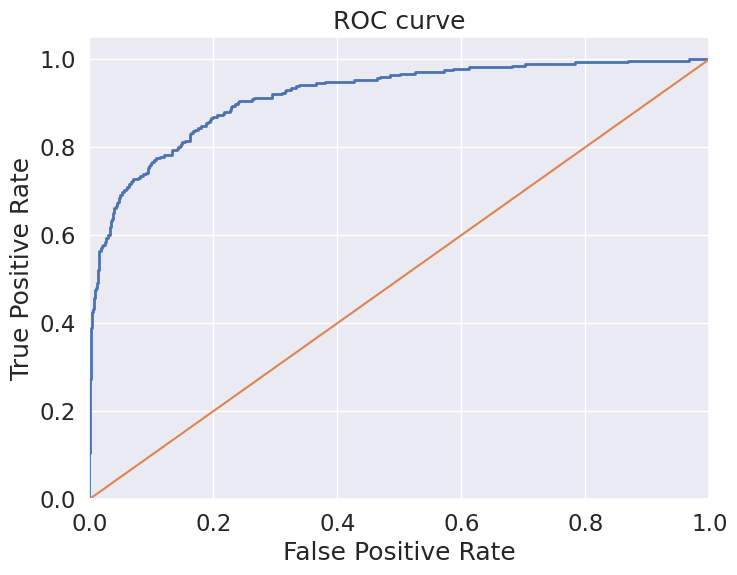

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Let's look at the accuracy, precision and recall metrics on the test sample:

In [ ]:
y_test_pred = random_search.best_estimator_.predict(X_test)

In [ ]:
# function for calculating metrics
def metrics_scan(y_test, y_test_pred):
    print('Metrics of the best model on test data:')
    accuracy = accuracy_score(y_test, y_test_pred)
    print('accuracy: ', round(accuracy, 2))

    precision = precision_score(y_test, y_test_pred)
    print('precision: ', round(precision, 2))

    recall = recall_score(y_test, y_test_pred)
    print('recall: ', round(recall, 2))

In [ ]:
metrics_scan(y_test, y_test_pred)

Metrics of the best model on test data:
accuracy:  0.92
precision:  0.85
recall:  0.56


Let's display the confusion matrix:

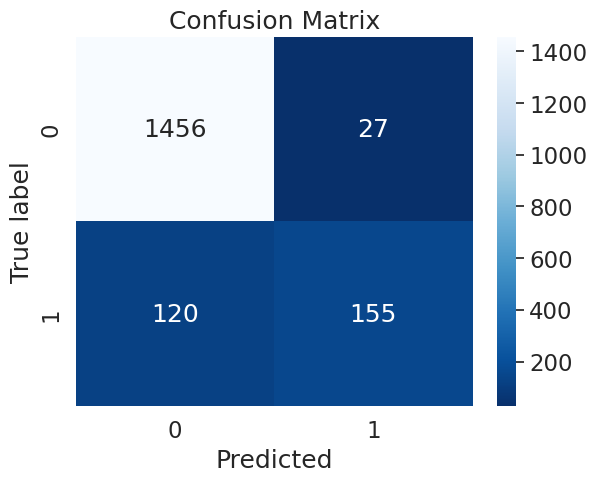

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

####  Conclusions

The confusion matrix shows that the high accuracy metric is achieved due to the accuracy of the model in determining TrueNegative. This metric is of little information in problems with unequal classes.

Precision - the proportion of objects called positive and actually being positive is quite high, but the recall showing what proportion of positive class objects out of all positive class objects the model determined is small - only 0.56.

Without knowing the economic component of the cost of the error of a false positive and false negative result, we cannot adjust the classification threshold to shift the model's predictions in any direction.

###  Evaluation of feature importance

Let's estimate the importance of features for the best model and plot feature importance graphs using the SHAP method:

In [ ]:
X_train_preprocessed = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
X_test_preprocessed = pipe_final.named_steps['preprocessor'].transform(X_test)

In [ ]:
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

 98%|===================| 1725/1758 [00:39<00:00]       

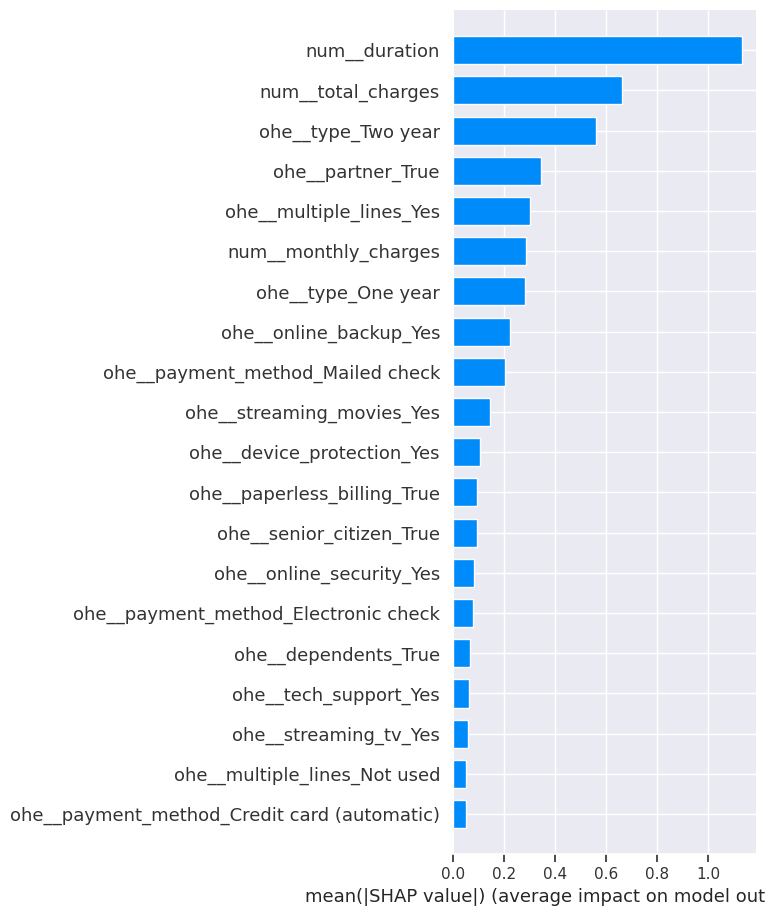

In [ ]:
explainer = shap.TreeExplainer(
    random_search.best_estimator_.named_steps['models'],
    X_test_preprocessed
)
shap_values = explainer(X_test_preprocessed)
shap.summary_plot(shap_values, X_test_preprocessed, plot_type='bar', feature_names=feature_names)

Let's see how exactly the significant features influence each prediction of the model:

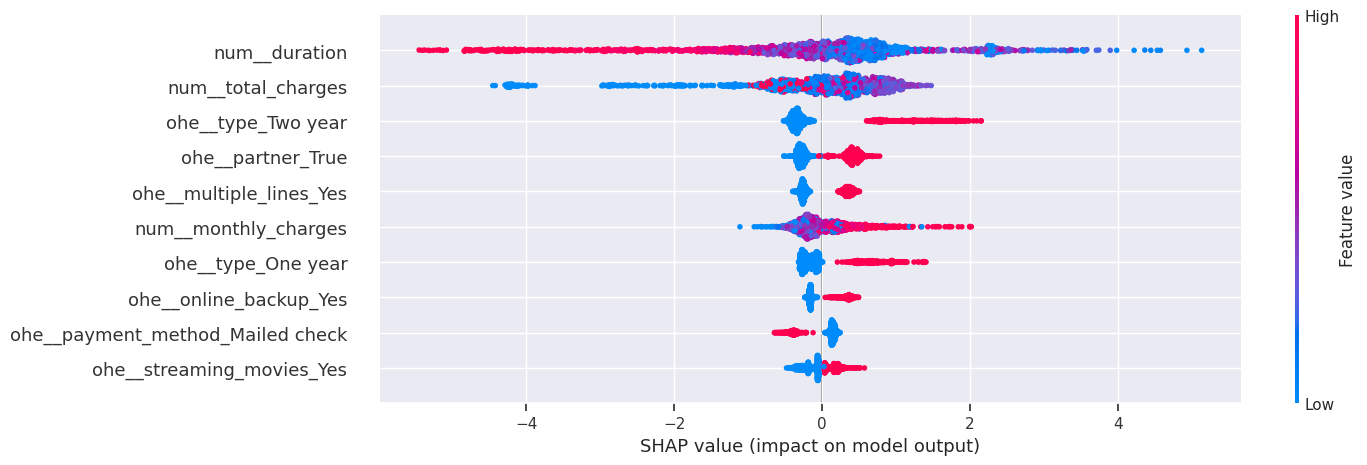

In [ ]:
shap.summary_plot(
    shap_values,
    X_test_preprocessed,
    plot_type='dot',
    plot_size=(15, 5),
    feature_names=feature_names,
    max_display=10
)

###  Conclusions

The most significant 10 features for our model were predictably those that showed the highest correlation with the target feature in the research analysis, as well as some others, namely:
- `duration` - the most significant feature, the longer the client is with us, the less likely he is to churn;
- `total_charges` - the second most significant feature, the less the client spends, the more likely he is to be satisfied with everything and is not going anywhere;
- `type` - if a two-year contract is concluded, the probability of churn is higher;
- `partner` - the presence of a partner increases the chance of client churn;
- `multiple_lines` - connecting the phone to several lines at the same time, also the probability of churn;
- `monthly_charges` - the lower the monthly tariff, the more loyal the client, you can prepare discounts;
- `type` - a one-year contract also increases the probability of churn;
- `online_backup` - using cloud storage also increases the likelihood of customer churn, perhaps the service is expensive and it is worth reducing the price;
- `payment_method` - of the Mailed check type promotes customer loyalty;
- `streaming_movies` - if streaming movies are connected, the customer is more loyal.

##  General conclusion and recommendations to the customer

**General information**

The purpose of the study is to develop a model for predicting customer churn, which will allow the company to find such users in advance and take measures to retain them as customers.

To solve the problem, a model was developed that predicts whether the subscriber will terminate the contract. Personal data about some customers, information about their tariffs and services were analyzed and recommendations on possible ways to retain customers were developed.

**Data preprocessing**

As a result of loading and analyzing the data, the following conclusions were made:

- column names are in camelCase notation with violations of the rules, it is necessary to convert the columns to snake_case notation;
- the data type in the `TotalCharges` column of the `data_contract` data frame contains quantitative data and is defined as `object`, it is necessary to convert to the `float64` type;

- the data type in the `SeniorCitizen` column of the `data_personal` dataframe contains boolean values ​​and is defined as `int64`; it must be converted to the `bool` type;
- heterogeneous presumably boolean data types expressed by Yes-No values ​​were detected;
- no gaps in columns were found.

*Result of initial data preprocessing:*

1. Column and index names have been converted to snake_case notation;
2. The `total_charges` column data type has been converted to `float64`, this conversion resulted in 11 rows with NaN values. As a result of the analysis, these rows have been deleted;
3. The `senior_citizen` column data type has been converted to `bool`;
4. No errors or duplicates have been found in the data.

*Recommendations for data collection:*

1. It is recommended to immediately collect data in the `total_charges` column in the `float64` type, this will allow for timely detection of missing values ​​in the column;
2. It is recommended to collect data types in columns with binary attributes in uniform values, without allowing variations in designations by columns in the `bool` data type.

**Exploratory data analysis**

*Quantitative feature analysis*

1. The histogram of the `monthly_charges` column shows that most clients pay around $20 per month. No outliers were found;

2. The `total_charges` column has a right-handed distribution. Outliers were found outside the whisker range; it is not advisable to remove these outliers, since they either represent a group of loyal company clients with long-term contracts, or a group of clients with high monthly rates with the risk of contract termination.

*Qualitative feature analysis*

1. The histogram of the `monthly_charges` column shows that most clients pay around $20 per month. No outliers were found outside the whisker range;
2. The `total_charges` column has a right-handed distribution. Outliers were found outside the whisker range; it is not advisable to remove these outliers, since they either represent a group of loyal company clients with long-term contracts, or a group of clients with high monthly rates with the risk of contract termination.

*Research of qualitative features*

1. `df_contract`

- The `type` column shows that more than half of clients prefer monthly payments to long-term contracts. Contracts for 1 and 2 years divide the second half of clients almost equally;
- The `paperless_billing` column shows that 59% of clients prefer not to receive paper bills, this is a good sign for the environment;
- The `payment_method` column shows that the electronic check is the leading payment method with 34%, the other 3 payment methods are divided equally by 22-23% of clients.

2. `df_personal`

- The `gender` column tells us that there are exactly equal numbers of men and women among clients;
- The `senior_citizen` column shows that only 16% of clients have reached retirement age;
- The `partner` column shows that clients with and without partners are also divided approximately equally;
- The `dependents` column determined that 30% of clients have children.

3. `df_internet`, `df_phone`

- `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` dataframes `df_internet`, `df_phone` show that clients use various services of the company with a distribution of approximately 37% to 63% to 50% to 50%.

**Correlation analysis**

1. Multicollinearities (very high correlations (0.9 +)) were found among columns with dates and their derivatives. For further training, we will exclude the columns `begin_date`, `end_date`, `end_date_2`. Multicollinearities were also found within features with Internet services.

2. High correlations were found between the column `monthly_charges` and columns with additional Internet services. This is natural.

3. The target feature `target` has a weak correlation with the input feature `duration`, `total_charges`, `monthly_charges`, `partner`, `payment_method` - from 0.21 to 0.37, with other features the correlation is very weak.

**Development of a model to determine the probability of customer churn**

Two models were trained: CatBoostClassifier and LogisticRegression. The RandomizedSearchCV method was used to select hyperparameters and determine the best model.

According to the ROC-AUC metric for the best model on cross-validation: 0.90, the best model was the CatBoostClassifier model with the following parameters: learning_rate': 0.05, iterations': 1000, depth': 4.

The ROC-AUC metric was chosen due to the imbalance of the target feature.

**Evaluation of the best model on test data**

AUC-ROC for the best model on test data: 0.92.

**Success criterion: AUC-ROC > 0.85 on the test set - achieved.**

Additionally, the following metrics were calculated and the confusion matrix was visualized:

Metrics of the best model on test data:
- accuracy: 0.92
- precision: 0.85
- recall: 0.56

**Confusion matrix**

From the confusion matrix we saw that the high accuracy metric is achieved due to the accuracy of the model in determining TrueNegative. This metric is of little information in problems with unequal classes.

Precision - the proportion of objects called positive and actually being positive is also quite high, but the recall showing what proportion of positive class objects out of all positive class objects the model determined is only 0.56 for a small one.

Without knowing the economic component of the cost of the error of a false positive and false negative result, we cannot adjust the classification threshold to shift the model's predictions in any direction.

**Analysis of the importance of features**

The most significant 10 features for our model were predictably those that showed the highest correlation with the target feature in the exploratory analysis, as well as some others, namely:
- `duration` - the most significant feature, the longer the client is with us, the less likely he is to churn;
- `total_charges` - the second most important feature, the less the client spends, the more likely he is to be satisfied with everything and is not going anywhere;
- `type` - if a two-year contract is concluded, the probability of churn is higher;
- `partner` - the presence of a partner increases the chance of customer churn;
- `multiple_lines` - connecting the phone to several lines at the same time, also the probability of churn;
- `monthly_charges` - the lower the monthly tariff, the more loyal the client, you can prepare discounts;
- `type` - a one-year contract also increases the probability of churn;
- `online_backup` - using cloud storage also increases the probability of customer churn, perhaps the service is expensive and it is worth reducing the price;
- `payment_method` - of the Mailed check type contributes to customer loyalty;
- `streaming_movies` - if streaming movies are connected, the client is more loyal.

**Recommendations for the customer**

1. Analysis of the importance of features in determining customer churn showed that the most important feature that a customer will stay with the company as long as possible is keeping him as a customer for a long time. And this is the basis of our model - to prevent churn.

2. In addition to the length of the contract, customer loyalty is affected by the cost of services, namely, the less the customer spends, the more satisfied he is. Reducing the tariff in advance is inappropriate from the point of view of profit, but if the model predicts the likelihood that the client will leave, based on the importance of features, the following measures can be recommended:
- discounts on the monthly tariff;
- discounts when concluding a contract for a year or two. Here I would like to add that the importance of features shows that customers with these types of payment are more likely to terminate the contract, you need to pay attention to how profitable this type of payment is compared to the monthly tariff, perhaps customers willing to pay for services in advance count on more serious discounts that they find with other operators;
- It is also worth paying attention (or offering discounts) to the cost of connecting the phone to several lines at the same time and the cost of cloud storage, perhaps the high price of these options also makes users look at other companies.

3. It would be advisable to determine the cost of the model error if the client leaves, and the model could not determine this, and the cost of the error if the model predicted the outflow of a loyal client. With such data, it is possible to configure the model to be more sensitive to a certain type of error and thus reduce costs.